In [10]:
import tensorflow

In [53]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

In [54]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(
'Train',
target_size=(150,150),batch_size=32,class_mode='categorical')

Found 891 images belonging to 3 classes.


In [57]:
train_generator.class_indices

{'Abbas': 0, 'Ijaz': 1, 'Saeed': 2}

In [58]:
test_generator = test_datagen.flow_from_directory(
'Test',target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 193 images belonging to 3 classes.


In [59]:
validation_generator = validation_datagen.flow_from_directory(
    'Validation',
     target_size=(150,150),batch_size=32,class_mode="categorical")

Found 414 images belonging to 3 classes.


In [60]:

history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=10)

Epoch 1/10
10/10 [==============================] - 23s 2s/step - loss: 1.0665 - acc: 0.4062 - val_loss: 1.0155 - val_acc: 0.3406
Epoch 2/10
10/10 [==============================] - 23s 2s/step - loss: 0.9418 - acc: 0.6406 - val_loss: 0.8887 - val_acc: 0.5969
Epoch 3/10
10/10 [==============================] - 24s 2s/step - loss: 0.7638 - acc: 0.7563 - val_loss: 0.6266 - val_acc: 0.8781
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 0.5260 - acc: 0.8687 - val_loss: 0.5396 - val_acc: 0.6781
Epoch 5/10
10/10 [==============================] - 23s 2s/step - loss: 0.4028 - acc: 0.8594 - val_loss: 0.2568 - val_acc: 0.9500
Epoch 6/10
10/10 [==============================] - 23s 2s/step - loss: 0.2628 - acc: 0.9469 - val_loss: 0.1674 - val_acc: 0.9937
Epoch 7/10
10/10 [==============================] - 23s 2s/step - loss: 0.1539 - acc: 0.9750 - val_loss: 0.1436 - val_acc: 0.9812
Epoch 8/10
10/10 [==============================] - 22s 2s/step - loss: 0.1497 - acc: 0.95

In [74]:
model.evaluate(test_generator)

7/7 [==============================] - 3s 412ms/step - loss: 0.0278 - acc: 1.0000


[0.027822943404316902, 1.0]

In [63]:
model.save('Face_Detection.h5')

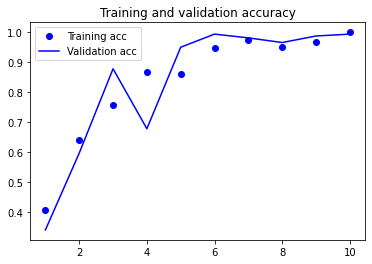

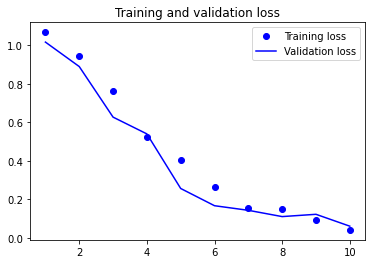

In [64]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [65]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [66]:
img = image.load_img("Test/Saeed/394.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [67]:
prediction

array([[2.6671094e-05, 3.8883582e-02, 9.6108979e-01]], dtype=float32)

In [68]:
img = image.load_img("Test/Ijaz/286.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [69]:
prediction

array([[0.00597442, 0.9057706 , 0.08825493]], dtype=float32)

In [70]:
img = image.load_img("Test/Abbas/394.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [71]:
prediction

array([[0.9735432 , 0.02358735, 0.00286943]], dtype=float32)

In [72]:
 a=prediction[0][0]
b= prediction[0][1]
c= prediction[0][2]


print(a,b,c)

0.9735432 0.023587354 0.0028694295


In [73]:



# Face Recognition

# Importing the libraries
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from tensorflow.keras.models import load_model
import numpy as np

from tensorflow.keras.preprocessing import image
model = load_model('Face_Detection.h5')

# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (150, 150))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
                     
        name="None matching"
        
        if(pred[0][0]>0.5):
            name='Ijaz'
        elif(pred[0][1]>0.5):
            name='Saeed'
        elif(pred[0][2]>0.5):
            name='Shakeel'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()


<>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-73-4f60b9df3fad>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]